<a href="https://colab.research.google.com/github/Eduardo-Unicamp/pylabs/blob/master/exp1_firstgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from matplotlib.ticker import MultipleLocator

In [18]:
#no teste como estou usando o peso que sobe lembrar de inverter os sinais das acelerações

In [19]:
tracker_data = pd.read_csv("data.csv")

In [31]:
tracker_data.tail()

,t,y
63,1.050000,0.090315
64,1.066667,0.077035
65,1.083333,0.063230
66,1.100000,0.048797
67,1.116667,0.034762


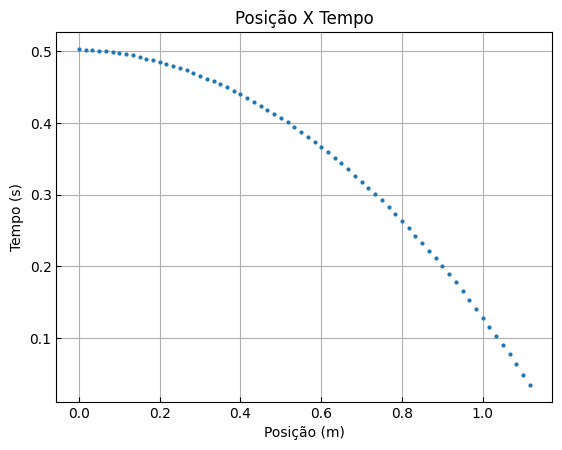

In [21]:
X,y = tracker_data['t'],tracker_data['y']

fig1 = plt.figure()
ax=fig1.add_subplot(1,1,1)

ax.set_title("Posição X Tempo")
ax.set_xlabel("Posição (m)")
ax.set_ylabel("Tempo (s)")
ax.tick_params(axis='both',direction='in')
ax.grid(True)

ax.plot(X,y,'o',ms=2)

<Figure size 640x480 with 0 Axes>

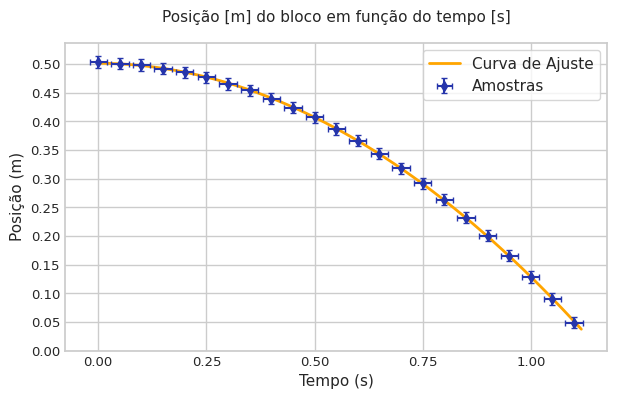

In [25]:
X,y = tracker_data['t'],tracker_data['y']



def a_func(X,a,b,c):
    return a*(X**2)+b*X+c
fig2 = plt.figure()
fig2=plt.figure(figsize=(7,4))
ax2 = fig2.add_subplot(1,1,1)

coeficientes, covariancia = curve_fit(a_func,X,y)

Xfit = np.linspace(min(X),max(X),50)
yfit = a_func(Xfit,*coeficientes)

#raiz da diag matriz cov sao erros dos coef
a_err = np.sqrt(covariancia[0][0])
b_err = np.sqrt(covariancia[1][1])
c_err = np.sqrt(covariancia[2][2])
#---------------------------------

#plot pontos

ax2.errorbar(
            X[np.arange(0,len(X),3)],y[np.arange(0,len(y),3)],#plotando somente um a cada 3 pontos
            xerr=0.02,yerr=0.01,
            label='Amostras',
            linestyle='none',
            color='#2635ab',
            marker='d',
            capsize=2,
            ms=5,
            zorder=3
            )
#plot da curva de fit
ax2.plot(
         Xfit,yfit,
        label= 'Curva de Ajuste',
         color='orange',
         lw = 2,
         zorder=1
        #linestyle='dashed'
        )
#ajustes de figura
sns.set_theme(style = "whitegrid")

ax2.set_title("Posição [m] do bloco em função do tempo [s]",fontsize=11,pad=15)
ax2.set_xlabel("Tempo (s)",fontsize=11)
ax2.set_ylabel("Posição (m)",fontsize=11)
ax2.tick_params(axis='both',direction='in',labelsize=9.5)
ax2.grid(True)
ax2.set_xticks(np.arange(0,max(X),0.25))
ax2.set_yticks(np.arange(0,max(y),0.05))
ax2.legend()


In [23]:
print(coeficientes)

[-0.36779958 -0.00481244  0.50129026]


In [24]:
#aceleração é a segunda derivada da funcao posição x tempo
acc = 2*coeficientes[0]
acc

np.float64(-0.7355991586915102)

In [39]:
float(0.956/(1.11**2))

0.7759110461813163